In [ ]:
import torch
import math

from IPython.display import Image
%matplotlib inline

"""
pytorch的loss主要是回归的loss和分类的loss。
注意每种loss的predict和target的输入形式，尤其是批模式的。
"""

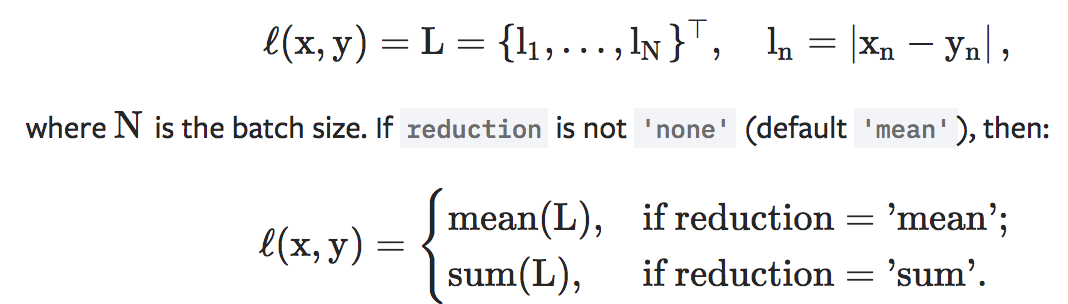

In [19]:
Image(filename='images/L1Loss.png', width=500, unconfined=True)

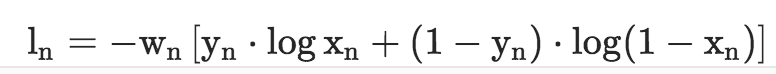

In [20]:
Image(filename='images/BCELoss.png', width=300, unconfined=True)

In [21]:
"""
wn是权重，作为函数参数传入。
演示批量的BCELoss()和BCEWithLogitsLoss()。
predict是第一个参数。
网络的最后输出是sigmoid()函数，表示分类标签为1的概率，尤其用于分类标签为0/1的问题。
"""
tensor_predict = torch.Tensor([
    [0.4803],
    [0.9]
])
# 这个loss比上一个小
tensor_predict2 = torch.Tensor([
    [0.9],
    [0.9]
])
tensor_true = torch.Tensor([1., 1.]).view(2, -1)
# 调用库计算
loss_func = torch.nn.BCELoss()
loss1 = loss_func(tensor_predict, tensor_true)
print(loss1)
# 手动计算
loss2 = 0
# BCELoss默认计算与sample数有关
sample_number, _ = tensor_true.shape
for true_label, predict in zip(tensor_true, tensor_predict):
    true_label_value = true_label.item()
    predict_value = predict.item()
    cur_loss = true_label_value * math.log(predict_value) \
               + (1 - true_label_value) * math.log(1 - predict_value)
    loss2 += cur_loss
loss2 = -loss2 * 1. / sample_number
print(loss2)
# 这个loss比上一个小
print(loss_func(tensor_predict2, tensor_true))

"""
多标签分类也是可以使用的。每个标签用0/1表示是否属于那个类。
例如下面这个例子。
"""
tensor_predict_mul = torch.Tensor([
    [ 1.9072,  1.1079,  1.4906],
    [-0.6584, -0.0512,  0.7608],
    [-0.0614,  0.6583,  0.1095]
])
tensor_true_mul = torch.FloatTensor([[0, 1, 1], [1, 1, 1], [1, 0, 0]])
m = torch.nn.Sigmoid()
tensor_predict_mul_sigmoid = m(tensor_predict_mul)
print(loss_func(tensor_predict_mul_sigmoid, tensor_true_mul))

# BCEWithLogitsLoss就是帮做了个Sigmoid
loss_func2 = torch.nn.BCEWithLogitsLoss()
print(loss_func2(tensor_predict_mul, tensor_true_mul))

tensor(0.4194)
0.41935244660000376
tensor(0.1054)
tensor(0.8068)
tensor(0.8068)


In [ ]:
Image(filename='images/CrossEntropy.png', width=600, unconfined=True)

In [ ]:
Image(filename='images/CrossEntropy2.png', width=300, unconfined=True)

In [ ]:
"""
CrossEntropyLoss的用法。
predict要分sample，但是target不分。
如下例计算，predict表示的意义是:
[0.1, 0.2, 0, 0.9]表示的是对于每个类的得分，这个得分不用softmax归一化。
target表示第1个sample的属于第4类，第2个sample是第3类。
公式说明:
对于单个loss
-x[class]表示在这个类的得分，误分类的得分不影响-x[class]，只影响后面的和。
分类正确，初始的分数偏离0越多，完全确信1刚开始就是-1，后面的分类如果在其他类有得分，会导致后面的和较大，两者之和也会越大，
loss就越大。
"""
# 调用库计算
loss_func = torch.nn.CrossEntropyLoss(reduction='none')
predict = torch.FloatTensor([
    [0.1, 0.2, 0., 0.9],
    [0.2, 0.2, 0.8, 0.3]
])
target = torch.LongTensor([3, 2])
print(loss_func(predict, target))
# 手动计算1
loss_result = []
for index, target_value in enumerate(target):
    x_class = predict[index][target_value]
    e_sum = 0
    for class_score in predict[index]:
        e_sum += math.exp(class_score)
    log_e_sum = math.log(e_sum)
    cur_loss = - x_class + log_e_sum
    loss_result.append(cur_loss)
print(loss_result)

# 手动计算2，不对。pytorch不是这么算的。。。
predict_soft_max = torch.nn.functional.softmax(predict, dim=1)
print(predict_soft_max)
loss_result2 = []
for index, target_value in enumerate(target):
    cur = 0
    for class_score, softmax_score in zip(predict[index], predict_soft_max[index]):
        cur += class_score * math.log(softmax_score)
    loss_result2.append(-cur)
print(loss_result2)